<a href="https://colab.research.google.com/github/fgsantosti/topicos_especiais_desenvolvimento/blob/main/analise_dados_brasileirao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Ler o CSV
df = pd.read_csv('rodada-2.csv')

In [ ]:
print('Colunas disponíveis no DataFrame df:')
print(df.columns.tolist())

In [ ]:
import pandas as pd

# 1. Ler o CSV
df = pd.read_csv('rodada-2.csv')

# 2. Garantir que as colunas usadas existem
colunas_necessarias = [
    'atletas.rodada_id',
    'atletas.atleta_id',
    'atletas.apelido',
    'atletas.nome',
    'A'
]
for c in colunas_necessarias:
    if c not in df.columns:
        raise ValueError(f'Coluna obrigatória ausente no CSV: {c}')

# 3. Tratar valores ausentes em A (assistências) como 0
df['A'] = df['A'].fillna(0)

# 4. Agrupar por rodada e jogador, somando as assistências
grupo = df.groupby(
    ['atletas.rodada_id', 'atletas.atleta_id', 'atletas.apelido', 'atletas.nome'],
    as_index=False
)['A'].sum()

# 5. Ordenar por rodada e por número de assistências (descendente)
grupo = grupo.sort_values(['atletas.rodada_id', 'A'], ascending=[True, False])

# 6. Pegar top 10 por rodada
top10_por_rodada = (
    grupo
    .groupby('atletas.rodada_id', group_keys=False)
    .head(10)
)

# 7. Exibir resultado
print(top10_por_rodada)

# Opcional: salvar para CSV
top10_por_rodada.to_csv('top10_assistencias_por_rodada.csv', index=False)

     atletas.rodada_id  atletas.atleta_id atletas.apelido  \
180                  2              89275         William   
424                  2             107093    Luciano Juba   
470                  2             110426        Bernabéi   
36                   2              68952         Marinho   
56                   2              70984           Payet   
102                  2              80544   Pol Fernández   
104                  2              80583      Lucas Lima   
106                  2              81121     Lucas Mugni   
114                  2              82627     Luiz Araújo   
124                  2              83817         Clayson   

                         atletas.nome    A  
180        Willian de Asevedo Furtado  2.0  
424   Luciano Batista da Silva Júnior  2.0  
470       Alexandro Ezequiel Bernabéi  2.0  
36          Mário Sérgio Santos Costa  1.0  
56              Florent Dimitri Payet  1.0  
102        Guillermo Matías Fernández  1.0  
104          

In [ ]:
import pandas as pd

# 1. Lista de rodadas que você quer analisar
rodadas = range(2, 17)  # 2 a 16

dfs = []

for r in rodadas:
    arquivo = f'rodada-{r}.csv'
    df_r = pd.read_csv(arquivo)

    # Se o arquivo NÃO tiver a coluna 'atletas.rodada_id', criamos
    if 'atletas.rodada_id' not in df_r.columns:
        df_r['atletas.rodada_id'] = r

    dfs.append(df_r)

# 2. Concatenar todas as rodadas em um único DataFrame
df = pd.concat(dfs, ignore_index=True)

# 3. Verificar se as colunas necessárias existem
colunas_necessarias = [
    'atletas.rodada_id',
    'atletas.atleta_id',
    'atletas.apelido',
    'atletas.nome',
    'A'
]
for c in colunas_necessarias:
    if c not in df.columns:
        raise ValueError(f'Coluna obrigatória ausente no CSV: {c}')

# 4. Tratar valores ausentes em A (assistências) como 0
df['A'] = df['A'].fillna(0)

# 5. Agrupar por rodada e jogador, somando as assistências
grupo = df.groupby(
    ['atletas.rodada_id', 'atletas.atleta_id', 'atletas.apelido', 'atletas.nome'],
    as_index=False
)['A'].sum()

# 6. Ordenar por rodada e por número de assistências (descendente)
grupo = grupo.sort_values(['atletas.rodada_id', 'A'], ascending=[True, False])

# 7. Top 10 jogadores com mais assistências EM CADA rodada (1 a 16)
top10_por_rodada = (
    grupo
    .groupby('atletas.rodada_id', group_keys=False)
    .head(10)
)

print("Top 10 por rodada (1 a 16):")
print(top10_por_rodada)

# 8. Se quiser, salvar o resultado
top10_por_rodada.to_csv('top10_assistencias_rodadas_1_a_16.csv', index=False)

# 9. Se você quiser o ranking geral de assistências SOMANDO as 16 rodadas:
ranking_geral = (
    grupo
    .groupby(['atletas.atleta_id', 'atletas.apelido', 'atletas.nome'], as_index=False)['A']
    .sum()
    .sort_values('A', ascending=False)
)

print("\nRanking geral de assistências (rodadas 1 a 16):")
print(ranking_geral.head(20))  # por exemplo, top 20 gerais

Top 10 por rodada (1 a 16):
       atletas.rodada_id  atletas.atleta_id atletas.apelido  \
180                    2              89275         William   
424                    2             107093    Luciano Juba   
470                    2             110426        Bernabéi   
36                     2              68952         Marinho   
56                     2              70984           Payet   
...                  ...                ...             ...   
10196                 16              93716  Paulo Henrique   
10197                 16              93790  Marlon Freitas   
10220                 16              95799           Artur   
10265                 16              99392         Michael   
10356                 16             105584     Lucas Piton   

                              atletas.nome    A  
180             Willian de Asevedo Furtado  2.0  
424        Luciano Batista da Silva Júnior  2.0  
470            Alexandro Ezequiel Bernabéi  2.0  
36             

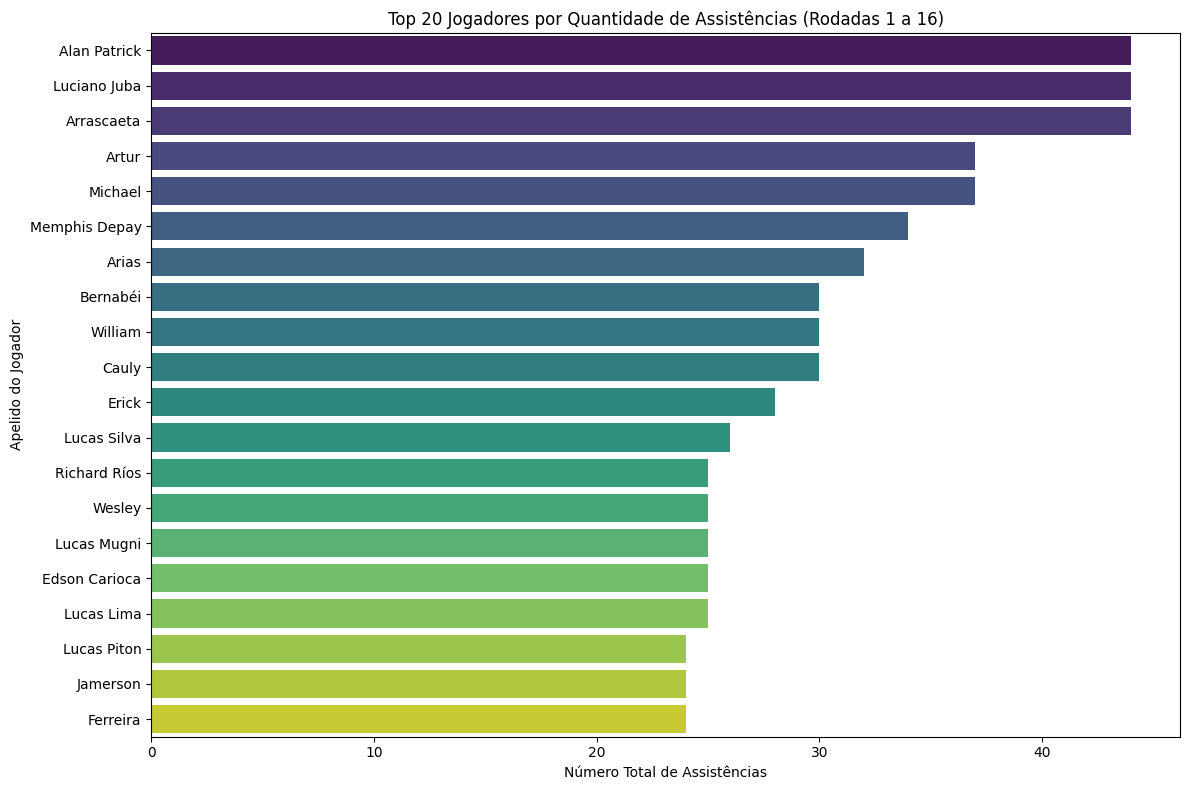

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Para uma melhor visualização, vamos considerar os top 20 jogadores do ranking geral
top_20_ranking_geral = ranking_geral.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='A', y='atletas.apelido', data=top_20_ranking_geral, hue='atletas.apelido', legend=False, palette='viridis')
plt.title('Top 20 Jogadores por Quantidade de Assistências (Rodadas 1 a 16)')
plt.xlabel('Número Total de Assistências')
plt.ylabel('Apelido do Jogador')
plt.tight_layout()
plt.show()

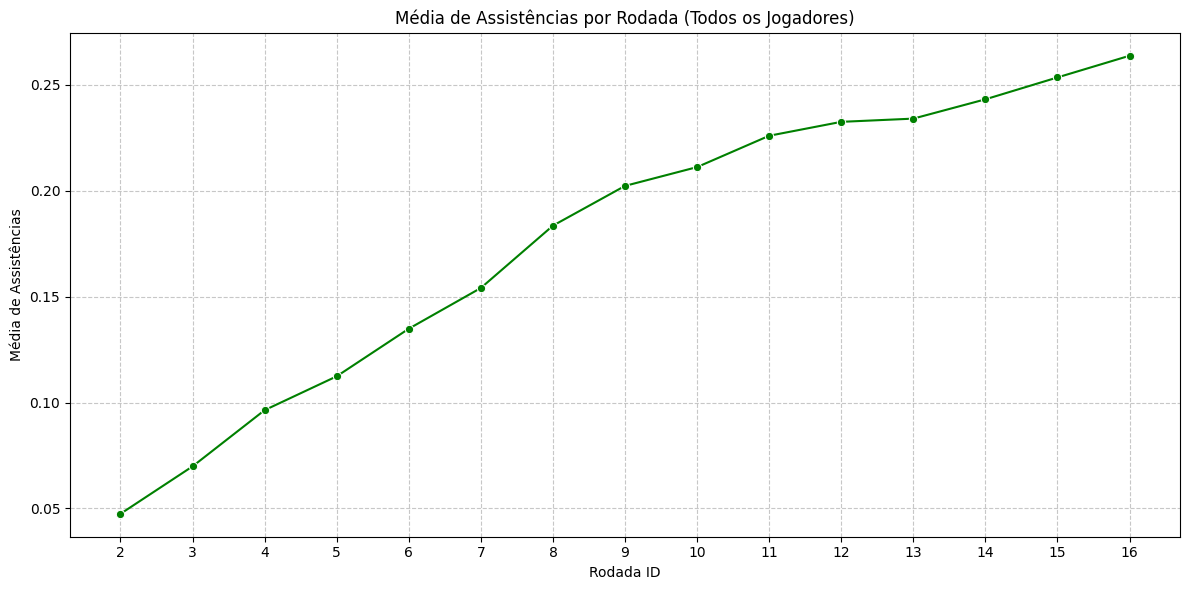

Média de Assistências por Rodada:
   atletas.rodada_id         A
0                  2  0.047478
1                  3  0.069869
2                  4  0.096403
3                  5  0.112376
4                  6  0.134831


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a média de assistências por rodada para todos os jogadores
media_assistencias_por_rodada = grupo.groupby('atletas.rodada_id')['A'].mean().reset_index()

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(x='atletas.rodada_id', y='A', data=media_assistencias_por_rodada, marker='o', color='green')
plt.title('Média de Assistências por Rodada (Todos os Jogadores)')
plt.xlabel('Rodada ID')
plt.ylabel('Média de Assistências')
plt.xticks(media_assistencias_por_rodada['atletas.rodada_id'].unique())
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Média de Assistências por Rodada:")
print(media_assistencias_por_rodada.head())

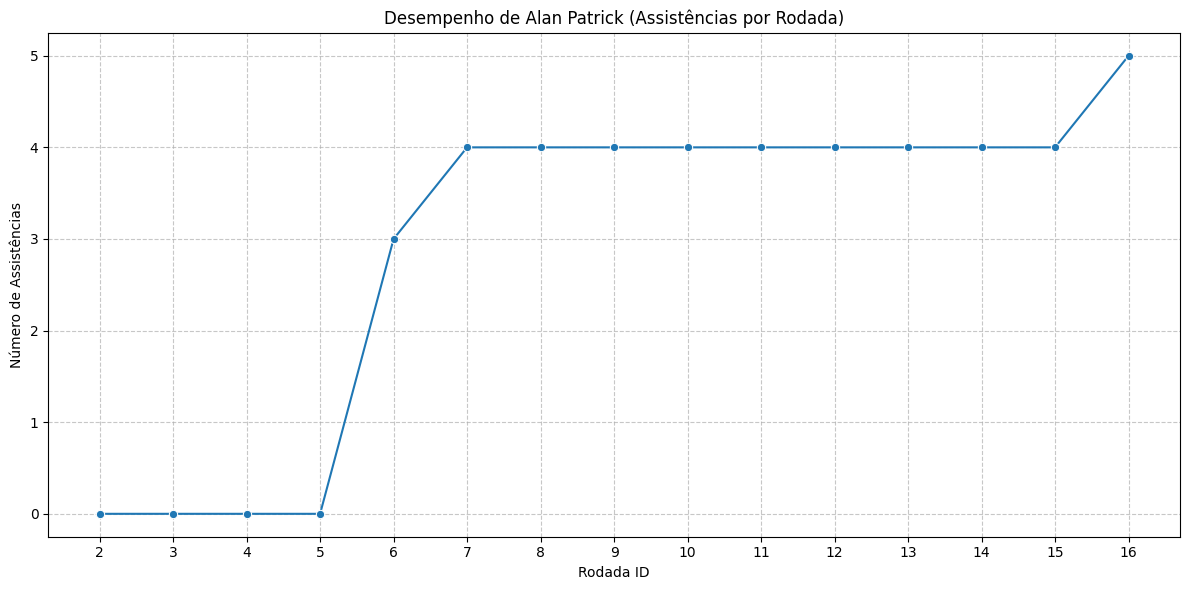

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar os dados para o jogador 'Alan Patrick'
alan_patrick_performance = grupo[grupo['atletas.apelido'] == 'Alan Patrick']

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(x='atletas.rodada_id', y='A', data=alan_patrick_performance, marker='o', hue='atletas.apelido', legend=False)
plt.title('Desempenho de Alan Patrick (Assistências por Rodada)')
plt.xlabel('Rodada ID')
plt.ylabel('Número de Assistências')
plt.xticks(alan_patrick_performance['atletas.rodada_id'].unique())
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Calcular a pontuação onde cada gol vale 8 pontos
ranking_geral_gols['Gols_Pontos'] = ranking_geral_gols['G'] / 8

# Exibir o ranking com a nova coluna de pontuação
print("Ranking geral de Gols com Pontuação (rodadas 1 a 16):")
print(ranking_geral_gols.head(20))

Ranking geral de Gols com Pontuação (rodadas 1 a 16):
     atletas.atleta_id  atletas.apelido  \
182              87863       Arrascaeta   
388             103445       Kaio Jorge   
322              99198          Vegetti   
95               78850         Reinaldo   
340             100652     Yuri Alberto   
267              94583            Pedro   
490             108133     Isidro Pitta   
703             131617      André Silva   
353             101290         Ferreira   
149              85048    Memphis Depay   
668             126471          Barreal   
434             105568           Lucero   
225              91607             Rony   
197              89368      Braithwaite   
506             109899          Batalla   
271              95131  Gabriel Taliari   
306              98225       Pedro Raul   
49               70360    Eduardo Sasha   
132              83257          Gabriel   
371             102130         Piquerez   

                                     atlet

Ranking geral de Gols (rodadas 1 a 16):
     atletas.atleta_id  atletas.apelido  \
182              87863       Arrascaeta   
388             103445       Kaio Jorge   
322              99198          Vegetti   
95               78850         Reinaldo   
340             100652     Yuri Alberto   
267              94583            Pedro   
490             108133     Isidro Pitta   
703             131617      André Silva   
353             101290         Ferreira   
149              85048    Memphis Depay   
668             126471          Barreal   
434             105568           Lucero   
225              91607             Rony   
197              89368      Braithwaite   
506             109899          Batalla   
271              95131  Gabriel Taliari   
306              98225       Pedro Raul   
49               70360    Eduardo Sasha   
132              83257          Gabriel   
371             102130         Piquerez   

                                     atletas.nome     G 

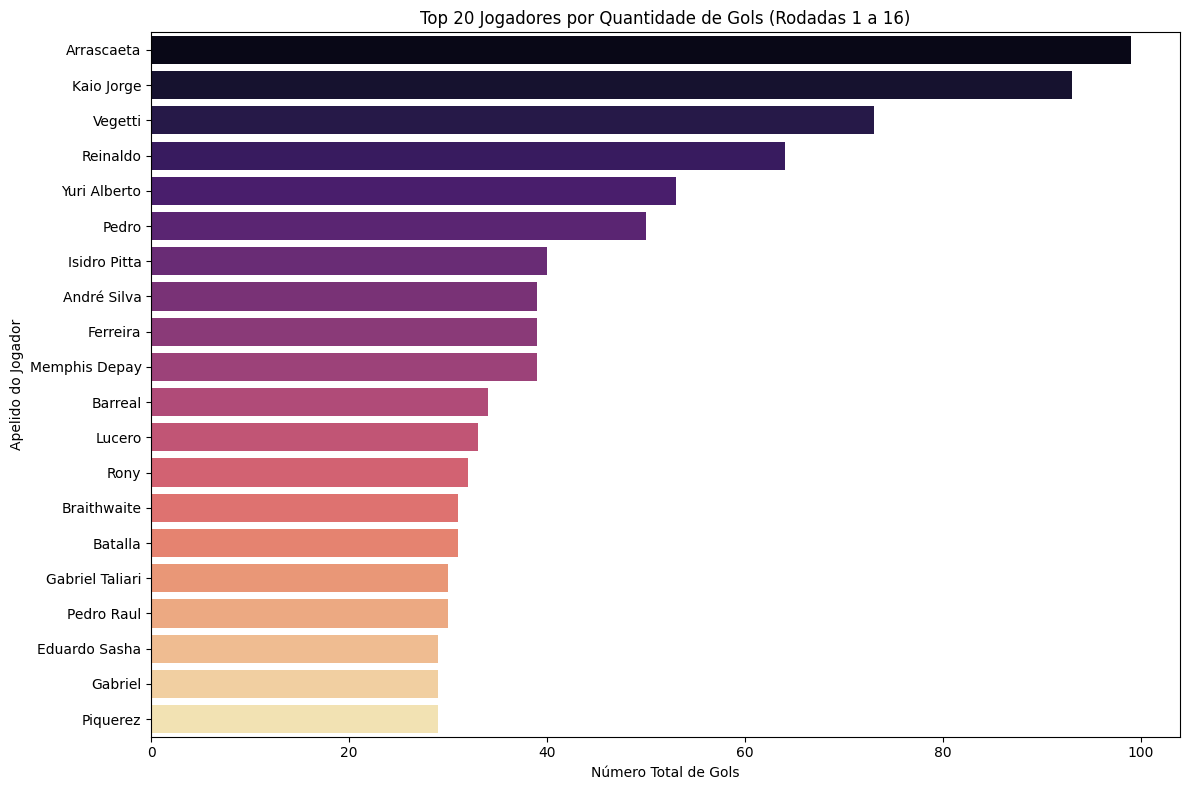

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tratar valores ausentes em G (gols) como 0
df['G'] = df['G'].fillna(0)

# 2. Agrupar por jogador, somando os gols
ranking_geral_gols = (
    df.groupby(['atletas.atleta_id', 'atletas.apelido', 'atletas.nome'], as_index=False)['G']
    .sum()
    .sort_values('G', ascending=False)
)

# 3. Pegar top 20 jogadores por gols
top_20_gols = ranking_geral_gols.head(20)

# 4. Exibir o resultado e criar o gráfico
print("Ranking geral de Gols (rodadas 1 a 16):")
print(top_20_gols)

plt.figure(figsize=(12, 8))
sns.barplot(x='G', y='atletas.apelido', data=top_20_gols, hue='atletas.apelido', legend=False, palette='magma')
plt.title('Top 20 Jogadores por Quantidade de Gols (Rodadas 1 a 16)')
plt.xlabel('Número Total de Gols')
plt.ylabel('Apelido do Jogador')
plt.tight_layout()
plt.show()

In [ ]:



#Grafico

Ranking geral de Gols com Pontuação (rodadas 1 a 16):
     atletas.atleta_id  atletas.apelido  \
182              87863       Arrascaeta   
388             103445       Kaio Jorge   
322              99198          Vegetti   
95               78850         Reinaldo   
340             100652     Yuri Alberto   
267              94583            Pedro   
490             108133     Isidro Pitta   
703             131617      André Silva   
353             101290         Ferreira   
149              85048    Memphis Depay   
668             126471          Barreal   
434             105568           Lucero   
225              91607             Rony   
197              89368      Braithwaite   
506             109899          Batalla   
271              95131  Gabriel Taliari   
306              98225       Pedro Raul   
49               70360    Eduardo Sasha   
132              83257          Gabriel   
371             102130         Piquerez   

                                     atlet

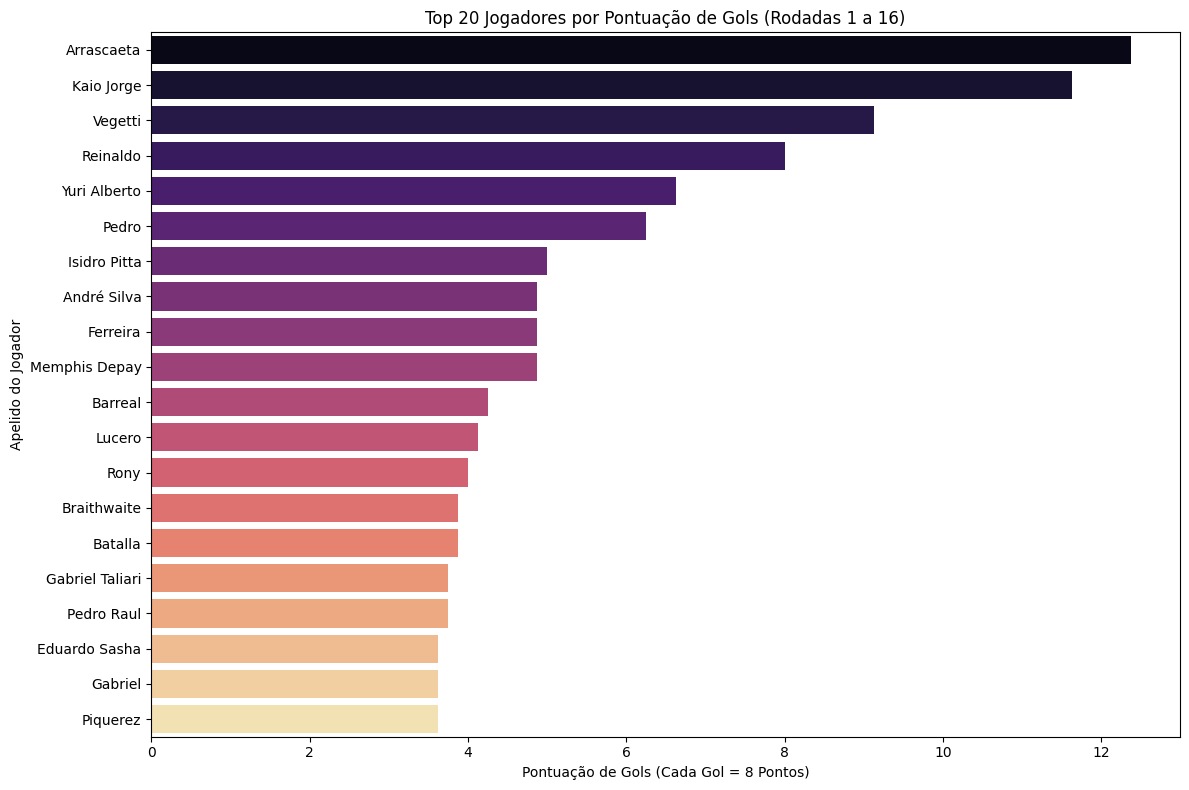

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico de barras para Gols_Pontos
plt.figure(figsize=(12, 8))
sns.barplot(x='Gols_Pontos', y='atletas.apelido', data=ranking_geral_gols.head(20), hue='atletas.apelido', legend=False, palette='magma')
plt.title('Top 20 Jogadores por Pontuação de Gols (Rodadas 1 a 16)')
plt.xlabel('Pontuação de Gols (Cada Gol = 8 Pontos)')
plt.ylabel('Apelido do Jogador')
plt.tight_layout()
plt.show()

Ranking geral de Desarmes com Pontuação (rodadas 1 a 16):
     atletas.atleta_id   atletas.apelido                        atletas.nome  \
382             102975           Escobar              Gonzalo Daniel Escobar   
252              93716    Paulo Henrique    Paulo Henrique de Oliveira Alves   
517             110727            Rubens                 Rubens Antônio Dias   
289              97145        Villasanti  Mathías Adalberto Villasanti Rolón   
39               68991       Lucas Sasha                Lucas Pacheco Affini   
269              94968  Juninho Capixaba        Luis Antônio da Rocha Júnior   
542             112709       Kaiki Bruno                Kaiki Bruno da Silva   
655             124526              Giay                        Agustín Giay   
142              84558      Lucas Romero                 Lucas Daniel Romero   
195              89275           William          Willian de Asevedo Furtado   
364             101727       Matheuzinho                Matheu

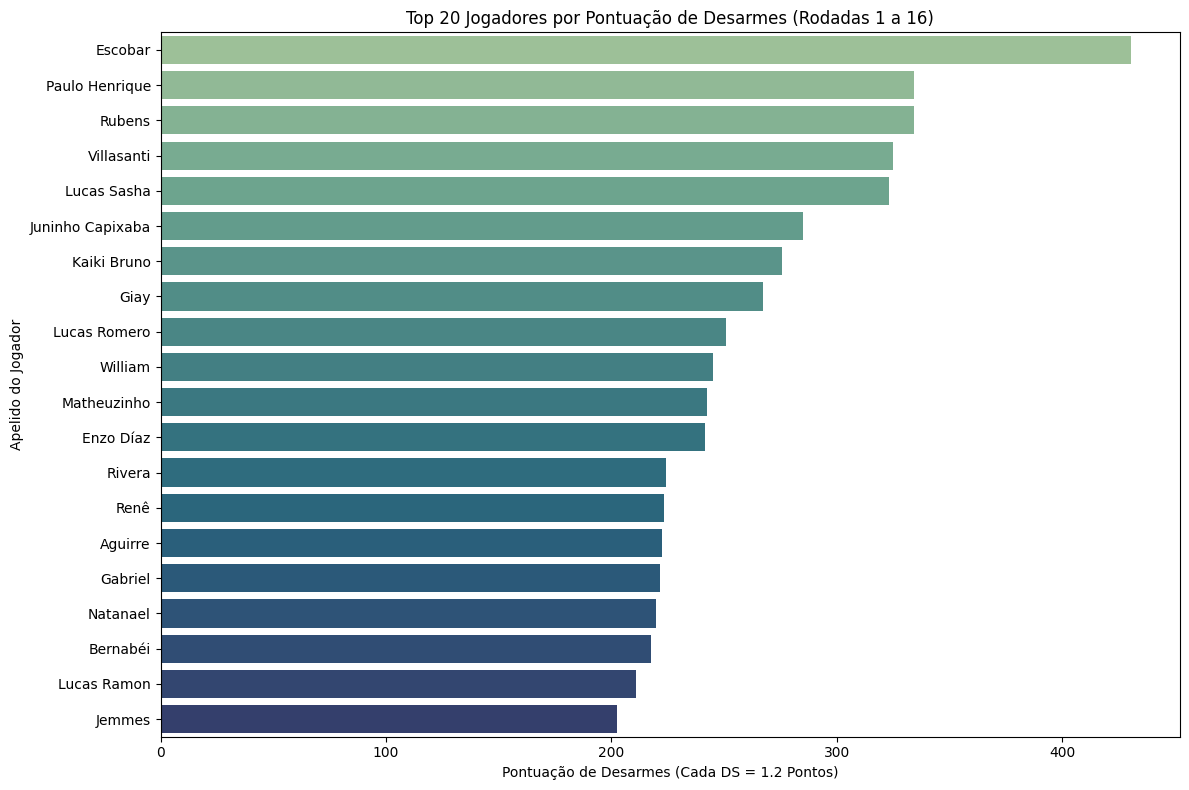

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tratar valores ausentes em DS (desarmes) como 0
df['DS'] = df['DS'].fillna(0)

# 2. Agrupar por jogador, somando os desarmes
ranking_geral_desarmes = (
    df.groupby(['atletas.atleta_id', 'atletas.apelido', 'atletas.nome'], as_index=False)['DS']
    .sum()
    .sort_values('DS', ascending=False)
)

# 3. Calcular a pontuação onde cada desarme vale 1.2 pontos
ranking_geral_desarmes['DS_Pontos'] = ranking_geral_desarmes['DS'] * 1.2

# 4. Pegar top 20 jogadores por pontuação de desarmes
top_20_desarmes = ranking_geral_desarmes.head(20)

# 5. Exibir o resultado
print("Ranking geral de Desarmes com Pontuação (rodadas 1 a 16):")
print(top_20_desarmes)

# 6. Criar o gráfico de barras para DS_Pontos
plt.figure(figsize=(12, 8))
sns.barplot(x='DS_Pontos', y='atletas.apelido', data=top_20_desarmes, hue='atletas.apelido', legend=False, palette='crest')
plt.title('Top 20 Jogadores por Pontuação de Desarmes (Rodadas 1 a 16)')
plt.xlabel('Pontuação de Desarmes (Cada DS = 1.2 Pontos)')
plt.ylabel('Apelido do Jogador')
plt.tight_layout()
plt.show()